In [56]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [59]:
df = pd.read_csv('Fifa 23 Players Data.csv')
df = df.set_index('Full Name')

column_names = list(df.columns)
column_names

['Known As',
 'Overall',
 'Potential',
 'Value(in Euro)',
 'Positions Played',
 'Best Position',
 'Nationality',
 'Image Link',
 'Age',
 'Height(in cm)',
 'Weight(in kg)',
 'TotalStats',
 'BaseStats',
 'Club Name',
 'Wage(in Euro)',
 'Release Clause',
 'Club Position',
 'Contract Until',
 'Club Jersey Number',
 'Joined On',
 'On Loan',
 'Preferred Foot',
 'Weak Foot Rating',
 'Skill Moves',
 'International Reputation',
 'National Team Name',
 'National Team Image Link',
 'National Team Position',
 'National Team Jersey Number',
 'Attacking Work Rate',
 'Defensive Work Rate',
 'Pace Total',
 'Shooting Total',
 'Passing Total',
 'Dribbling Total',
 'Defending Total',
 'Physicality Total',
 'Crossing',
 'Finishing',
 'Heading Accuracy',
 'Short Passing',
 'Volleys',
 'Dribbling',
 'Curve',
 'Freekick Accuracy',
 'LongPassing',
 'BallControl',
 'Acceleration',
 'Sprint Speed',
 'Agility',
 'Reactions',
 'Balance',
 'Shot Power',
 'Jumping',
 'Stamina',
 'Strength',
 'Long Shots',
 'Aggress

In [60]:
attr = ['Height(in cm)','Weight(in kg)','BallControl','Acceleration','Sprint Speed','Agility']

data = df[attr]

data

,Height(in cm),Weight(in kg),BallControl,Acceleration,Sprint Speed,Agility
Full Name,,,,,,
Lionel Messi,169,67,93,87,76,91
Karim Benzema,185,81,91,79,80,78
Robert Lewandowski,185,81,89,76,75,77
Kevin De Bruyne,181,70,90,76,73,76
Kylian Mbappé,182,73,91,97,97,93
...,...,...,...,...,...,...
Darren Collins,174,68,48,69,68,59
Dejiang Yang,175,60,46,52,57,59
Liam Mullan,170,65,50,70,59,46


/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

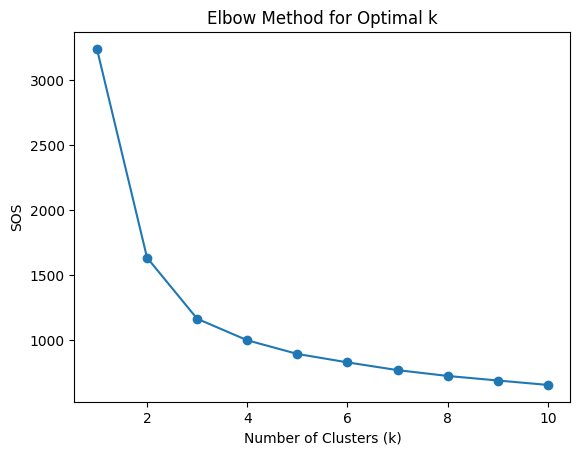

In [62]:
# Normalize the data
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data)

# Use the Elbow Method to find the optimal k
inertia_values = []
k_values = range(1, 11) 

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_data)
    inertia_values.append(kmeans.inertia_)

##plot
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SOS')
plt.show()

In [63]:
optimal_k = 3  

# Apply k-means clustering with the optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(normalized_data)
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)



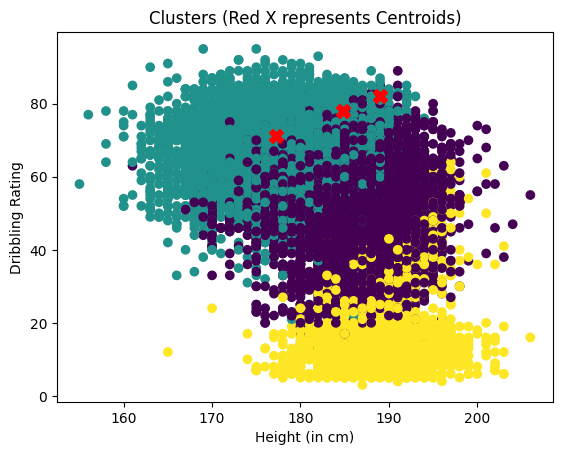

In [64]:
plt.scatter(df['Height(in cm)'], df['Dribbling'], c=df['Cluster'], cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=100)
plt.title('Clusters (Red X represents Centroids)')
plt.xlabel('Height (in cm)')
plt.ylabel('Dribbling Rating')
plt.show()

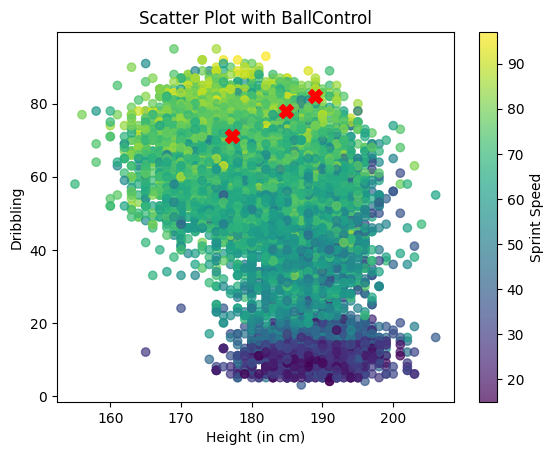

In [65]:
plt.scatter(df['Height(in cm)'], df['Dribbling'], c=df['Sprint Speed'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Sprint Speed')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=100)  # Centroids
plt.title('Scatter Plot with BallControl')
plt.xlabel('Height (in cm)')
plt.ylabel('Dribbling')
plt.show()